In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# The Pandas Series Object

## <font color=red>What Is a Pandas Series?</font>

A pandas Series object is a one-dimensional, labeled array made up of an autogenerated index that starts at 0 and data of a single data type. A couple of important things to note here:

- If I try to make a pandas Series using multiple data types like `int` and `string` values, the data will be converted to the same `object` data type; the `int` values will lose their `int` functionality. 

- `NaN` values are categorized as data type `float`, so if I have missing values in a Series of `int` data type values, the integers will be converted to floats. If I see this behavior occur, it might alert me to the fact that I have some missing values.

By default, pandas will use a RangeIndex if you do not specify otherwise (I will demonstrate this below). You can think of a pandas Series like a single column from a table in Excel or Google Sheets. Pandas also has a structure like the Excel table, which is a DataFrame object. 

A pandas Series can be created in several ways, some of which I'll demonstrate below, but **it will most often be created by pulling a single column from a pandas Dataframe in which case the Series has the same index as the Dataframe.** 

Check out even more ways to create a pandas Series [here](https://www.tutorialspoint.com/python_pandas/python_pandas_series.htm#:~:text=Series%20is%20a%20one%2Ddimensional,labels%20are%20collectively%20called%20index.).

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Create a Pandas Series:

#### From a Python List

In [2]:
# Here I create a list of colors and use `type()` function to show it's a list object.

colors = ['red', 'yellow', 'green', 'blue', 'orange', 'red', 'violet', 'indigo']
print(f'colors is a {type(colors)}.')

colors is a <class 'list'>.


In [3]:
# Here I convert the list `colors` using the Series() method.

color_series = pd.Series(colors)
color_series

0       red
1    yellow
2     green
3      blue
4    orange
5       red
6    violet
7    indigo
dtype: object

In [4]:
# I can see that color_series is now a pandas Series object.

print(f'color_series is a {type(color_series)}')

color_series is a <class 'pandas.core.series.Series'>


<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

##### The Components of a Pandas Series - Index, Data

Now that I have a pandas Series to work with, I can look at the components of the Series object using the `.index` and the `.values` attributes. The pandas Series object supports both integer- and label-based indexing using the indexing operator `[]`. 

I will demonstrate concrete examples of indexing using the `.loc` and `.iloc` attributes in [this section](#indexing) below.

In [5]:
# I can access its autogenerated index by using the .index attribute.

color_series.index

RangeIndex(start=0, stop=8, step=1)

In [6]:
# I see that the index is the default RangeIndex subclass.

print(f'The index of my color_series is {type(color_series.index)}.')

The index of my color_series is <class 'pandas.core.indexes.range.RangeIndex'>.


In [7]:
# I can access its data by using the values attribute.

color_series.values

array(['red', 'yellow', 'green', 'blue', 'orange', 'red', 'violet',
       'indigo'], dtype=object)

In [8]:
# I can see that accessing the data in my Series using the .values attribute returns a numpy array.

print(f'The values in my color_series are {type(color_series.values)}.')

The values in my color_series are <class 'numpy.ndarray'>.


<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### From a NumPy Array

In [9]:
# Create a numpy array.

arr = np.array([5, 10, 15, 20, 25, 30, 35, 40, 40])

In [10]:
# Convert my numpy array to a pandas Series.

numeric_series = pd.Series(arr)
numeric_series

0     5
1    10
2    15
3    20
4    25
5    30
6    35
7    40
8    40
dtype: int64

In [11]:
# Confirm the conversion.

print(f'My numeric_series is a {type(numeric_series)}.')

My numeric_series is a <class 'pandas.core.series.Series'>.


<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### From a Python Dictionary. 

- Here the dictionary keys are used to construct the index.

In [12]:
# Create a python dictionary.

data = {'a' : 0., 'b' : 1., 'c' : 2., 'd': 3., 'e': 4., 'f': 5.}

In [13]:
# Convert dictionary to a pandas Series

diction_series = pd.Series(data)
diction_series

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
dtype: float64

In [14]:
# Confirm the conversion.

print(f'My diction_series is a {type(diction_series)}.')

My diction_series is a <class 'pandas.core.series.Series'>.


<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### From a Pandas DataFrame

When I pull a column from a pandas DataFrame, this is also a Series object. It will retain the same index as the DataFrame, but I'm jumping ahead; we'll learn more about pandas DataFrames in the near future.

**For now, all you need to know is that a Series can be pulled from a DataFrame in one of the following ways:**

- **Using Attribute Access *aka Dot Notation*.**

```python
df.series
```

- **By Passing a Column Name as a String to the Indexing Operator *aka Bracket Notation*.**

```python
df['series']
```

![Pandas Series Diagram](https://files.realpython.com/media/fig-2.2bee1e181467.png)

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

## <font color=orange>So What's So Great About a Pandas Series?</font>

A Series can be made up of any data type, it allows for indexing and subsetting of data, and comes with many useful attributes and methods adding an enormous array of functionality to this pandas object. One of the most impressive features of pandas is that it offers vectorized functions optimized to operate on Series (and DataFrame) objects; that means that I can call a function on an entire Series instead of a single string or scalar value. 

<font color=purple>I'll explore all of these awesome features in depth throughout the rest of this notebook.</font>

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

## <font color=green>Now What?</font>

### Methods

**Methods** used on pandas Series objects often return new Series objects; most also offer parameters with default settings designed to keep the user from mutating the original Series objects. I can either assign the transformed Series to a variable or reassign the transformed Series to the original variable if I really want to change the original data. 

<div class="alert alert-block alert-warning">Be careful about mutating your original data, and always, always confirm that the data you are working with is the data, and data type, that you think you are working with!</div>

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.head()`, `.tail()`, and `.sample()`

The `.head(n)` method returns the first n rows in the Series; n = 5 by default. This method returns a new Series with the same indexing as the original Series. 

The `.tail(n)` method returns the last n rows in the Series; n = 5 by default. Increase or decrease your value for n to return more or less than 5 rows.

The `.sample(n)` method returns a random sample of rows in the Series; n = 1 by default. Again, the index is retained.

In [15]:
# The default is the first 5 rows.

color_series.head()

0       red
1    yellow
2     green
3      blue
4    orange
dtype: object

In [16]:
# Calling the .tail() method with our n = 2 returns a Series with the last two rows.

color_series.tail(2)

6    violet
7    indigo
dtype: object

In [17]:
# The default for the `.sample()` method is one row.

color_series.sample()

1    yellow
dtype: object

In [18]:
# Calling the `.head()`, `.tail()`, or `.sample()` methods on our Series returns a new Series.

print(type(color_series.head()))
print(type(color_series.tail()))
print(type(color_series.sample()))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.astype()`

The `.astype()` method allows me to convert a Series from one data type to another. Like most methods, it returns a new transformed Series by default instead of mutating my original data.

>**Example:** Default parameters for `.astype()`
```python
numeric_series.astype(dtype, copy: bool = True, errors: str = 'raise')
```

In [19]:
# Here I change the data type of `numeric_series` to object, as you can see below.

numeric_series.astype('str')

0     5
1    10
2    15
3    20
4    25
5    30
6    35
7    40
8    40
dtype: object

In [20]:
# However, since I didn't reassign that transformation, the original Series' data type is still int64.

numeric_series

0     5
1    10
2    15
3    20
4    25
5    30
6    35
7    40
8    40
dtype: int64

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.describe()`

The `.describe()` method can be used to return descriptive statistics on either a pandas Series or DataFrame object; the information it returns depends on whether it's used on a numeric or non-numeric Series. When used on a DataFrame, it analyzes only the numeric columns by default. The parameters can be adjusted to include or exclude certain data types.

```python
series_or_df.describe(percentiles=None, include=None, exclude=None)
```

In [21]:
# Returns the total count, unique value count, most frequent value, and frequency of top value.

color_series.describe()

count       8
unique      7
top       red
freq        2
dtype: object

In [22]:
# Confirm a new Series object is returned.

type(color_series.describe())

pandas.core.series.Series

In [23]:
# Returns a Series of summary statistics on a column with a numeric data type.

numeric_series.describe()

count     9.000000
mean     24.444444
std      12.856041
min       5.000000
25%      15.000000
50%      25.000000
75%      35.000000
max      40.000000
dtype: float64

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.value_counts()`

The `.value_counts()` method returns a new Series consisting of the values from the original Series as the index labels and values consisting of the frequency of occurance of the unique labels in the original Series. This is an extremely useful method you will find yourself using often with Series containing object and category data types. 

Below you can see the default settings for the method's parameters.

```python
series.value_counts(
    normalize=False,
    sort=True,
    ascending=False,
    bins=None,
    dropna=True,
)
```

In the [Chaining Methods](#chaining) section below, we will see even more powerful uses for this method.

In [24]:
# Default - frequency of unique values.

color_series.value_counts()

red       2
blue      1
yellow    1
orange    1
indigo    1
green     1
violet    1
dtype: int64

In [25]:
# normalize=True returns the relative frequency of the unique values.

color_series.value_counts(normalize=True)

red       0.250
blue      0.125
yellow    0.125
orange    0.125
indigo    0.125
green     0.125
violet    0.125
dtype: float64

In [26]:
# normalize=True and ascending=True displays the largest relative frequency last.

color_series.value_counts(normalize=True, ascending=True)

violet    0.125
green     0.125
indigo    0.125
orange    0.125
yellow    0.125
blue      0.125
red       0.250
dtype: float64

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.nlargest()` and `.nsmallest()`

These methods allow me to get n largest or n smallest values from either a pandas Series or DataFrame object. **I can set the `keep` parameter to `'first'`, `'last'`, or `'all'` to deal with duplicate largest values;** this is quite handy. 

The default argument for `keep` is shown below.

```python
Series.nlargest(n=5, keep='first')
```

```python
Series.nsmallest(n=5, keep='first')
```

```python
DataFrame['Series'].nlargest(n=5, keep='first')
```

```python
DataFrame['Series'].nsmallest(n=5, keep='first')
```

<div class="alert alert-block alert-info"><b>Tip:</b> The `n` parameter accepts an integer argument for the number of largest (or smallest) values you want returned; the default is `n=5` in descending order. If I want all of the observations returned that have the max (top 1) value, whether that is more than OR exactly 1, I can run the code below. <b>Don't be afraid to play with the parameters to see what happens if you adjust or even remove an argument! Experiementing with my code is how I learn more about how methods and functions work.</b></div>

In [27]:
# This allows me to return all observations with the max value in a Series.
# 'Return the 1 largest value OR 'all' of the values that have the max value if a tie.'

numeric_series.nlargest(n=1, keep='all')

7    40
8    40
dtype: int64

In [28]:
# What if I want the observations with the first, second, and third largest values returned?
# I can change my argument for `n` to return more values in order of descending value manually.

numeric_series.nlargest(n=4, keep='all')

7    40
8    40
6    35
5    30
dtype: int64

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.sort_values()` and `.sort_index()`

These are handy methods, especially when chaining methods; they allow you to either sort your values or index respectively in asecnding or descending order. You can adjust other parameters as well if you need more functionality.

In [29]:
# Using `.sort_values()` on a column with string values returns a Series in alphabetic order, ascending.

color_series.sort_values()

3      blue
2     green
7    indigo
4    orange
0       red
5       red
6    violet
1    yellow
dtype: object

In [30]:
# It works as you would think with numerical values; setting ascending=False returns values in descending order.

numeric_series.sort_values(ascending=False)

8    40
7    40
6    35
5    30
4    25
3    20
2    15
1    10
0     5
dtype: int64

In [31]:
# I can reverse the order of my Series using the index order.

color_series.sort_index(ascending=False)

7    indigo
6    violet
5       red
4    orange
3      blue
2     green
1    yellow
0       red
dtype: object

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.any()` and `.all()`

The `.all()` method performs a logical `AND` operation on a row or column and returns a bool value indicating whether **all of the elements are True**.

The `.any()` method performs a logical `OR` operation on a row or column and returns a bool value indicating whether **any of the elements are True**.

In [32]:
# Here I check to see if all of the values in my Series meet my condition.

(color_series == 'red').all()

False

In [33]:
# Here I check to see if any of the values in my Series meet my condition.

(color_series == 'red').any()

True

In [34]:
# Here I check to see if any of my values in `numeric_series` are less than 0.

(numeric_series < 0).any()

False

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### String Methods

- String methods perform vectorized string operations on each string value in the original Series and return a transformed copy of the original Series. We have to use the `str` property to access the string method.

```python
series.str.string_method()
```

>**String Method Examples**

|           |          |             |          |
|:---------:|:--------:|:-----------:|:--------:|
| len()   | lower()| translate()| islower()|
| ljust() |upper() | startswith() | isupper() |
| rjust() | find() | endswith() | isnumeric() |
| center() | rfind() | isalnum() | isdecimal() |
| zfill() | index() | isalpha() | split() |
| strip() | rindex() | isdigit() | rsplit() |
| rstrip() | capitalize() | isspace() | partition()|
| lstrip() | swapcase() | istitle() | rpartition() |

>**Methods Using Regular Expressions**


|Method|Description|
|:----:|:---------:|
|match()|Call re.match() on each element, returning a boolean.|
|extract()|Call re.match() on each element, returning matched groups as strings.|
|findall()|Call re.findall() on each element.|
|replace()|Replace occurrences of pattern with some other string.|
|contains()|Call re.search() on each element, returning a boolean.|
|count()|Count occurrences of pattern.|
|split()|Equivalent to str.split(), but accepts regexps.|
|rsplit()|Equivalent to str.rsplit(), but accepts regexps.|

In [35]:
# The string method .capitalize() is applied to each string value in the Series.

color_series.str.capitalize()

0       Red
1    Yellow
2     Green
3      Blue
4    Orange
5       Red
6    Violet
7    Indigo
dtype: object

In [36]:
# What if my colors were hyphenated like this for some terrible reason?

bad_series = color_series.str.join('-')
bad_series

0          r-e-d
1    y-e-l-l-o-w
2      g-r-e-e-n
3        b-l-u-e
4    o-r-a-n-g-e
5          r-e-d
6    v-i-o-l-e-t
7    i-n-d-i-g-o
dtype: object

In [37]:
# I could replace those hyphens with an empty string to make my words pretty again! It could happen!

bad_series.str.replace('-', '')

0       red
1    yellow
2     green
3      blue
4    orange
5       red
6    violet
7    indigo
dtype: object

<font color=purple>We will get A LOT of practice using string functions; don't worry!</font>

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

**Let's import some different data to work with.**

In [38]:
from pydataset import data
tips = data('tips')

In [39]:
# Use the .head() method to peek at my pandas DataFrame.

tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


>**Example:** I can pull the `day` column from the tips DataFrame and assign it to the variable `day`. Maybe I want to see how many Null values are in the `day` Series.

In [40]:
# Create Series `day`.

day = tips.day

In [41]:
# This returns a boolean Series.

day.isna()

1      False
2      False
3      False
4      False
5      False
       ...  
240    False
241    False
242    False
243    False
244    False
Name: day, Length: 244, dtype: bool

In [42]:
# I can sum the True (1) values in my bool Series from above by chaining the `.sum()` method; I have 0 Null values.

day.isna().sum()

0

In [43]:
# Here I can see the unique values and their frequency of occurence in the `day` Series.

day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [44]:
# I can chain the `value_counts()` and `.head()` methods to return the most freq value with its count.

day.value_counts().head(1)

Sat    87
Name: day, dtype: int64

In [45]:
# I can chain the `value_counts()` and `.tail()` methods to return the least freq value with its count.

day.value_counts().tail(1)

Fri    19
Name: day, dtype: int64

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.apply()`

The `.apply()` method accepts a python or NumPy function as an argument and applies that function on each element in my Series. `.apply()` does not only accept a built-in function as an argument; you can pass custom and even lambda functions as arguments.

>**Example:** What if I want to know the length of each element in my `day` Series? What if I then want to see the frequency of the unique values in the Series returned?

In [46]:
# This returns a new Series of element lengths; the indexes of the `day` Series and this new Series align.

day.apply(len)

1      3
2      3
3      3
4      3
5      3
      ..
240    3
241    3
242    3
243    3
244    4
Name: day, Length: 244, dtype: int64

In [47]:
# Here I see that 182 of the values in `day` have a length of 3, and 62 have a length of 4. Hello chaining.

day.apply(len).value_counts()

3    182
4     62
Name: day, dtype: int64

In [48]:
# Create custom function that takes in a string argument to use with `.apply()` on an each element in a Series.

def day_cat(day):
    if day in ['Thur', 'Fri']:
        return 'weekday'
    else:
        return 'weekend'

In [49]:
# Here I pass my `day_cat` function as an argument to the `.apply()` function to return a new Series.

day.apply(day_cat).sample(10)

186    weekend
184    weekend
180    weekend
50     weekend
59     weekend
81     weekday
154    weekend
239    weekend
146    weekday
26     weekend
Name: day, dtype: object

In [50]:
# I can employ method chaining to return the `.value_counts()` of the new Series.

day.apply(day_cat).value_counts()

weekend    163
weekday     81
Name: day, dtype: int64

<div class="alert alert-block alert-info"><b>Remember:</b> Unless I assign the Series returned from using the functions and methods above, my original Series data remains the same. If I want to keep the Series with weekend and weekday labels, I have to assign it to a variable.</div>

In [51]:
# My `day` Series still has its original values.

day.sample(5)

167     Sun
16      Sun
172     Sat
120    Thur
75      Sat
Name: day, dtype: object

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.map()`

The `.map()` method is used for substituting each value in a Series with another value; I can pass `.map()` a function, a dictionary, or a Series. 

`.map()` has been a personal favorite of mine ever since we shared a special moment together during the regression project during Bayes, so it has to be included here. I can do the same thing I did above with my `day_cat()` function and `.apply()` without writing the function first.

**Values in your original Series that are not found in the dictionary as keys are converted to NaN values.**

In [52]:
# I can map values from a dictionary to values in my original Series and assign it to a variable, `day_cats`.

day_cats = day.map({'Thur': 'weekday', 'Fri': 'weekday', 
                    'Sat': 'weekend', 'Sun': 'weekend'})
day_cats.sample(5)

61     weekend
106    weekend
119    weekday
40     weekend
10     weekend
Name: day, dtype: object

In [53]:
# I can map a function to each element in my original Series and assign it to a variable.

identify = day_cats.map('I am a {}'.format)
identify.sample(5)

83     I am a weekday
219    I am a weekend
229    I am a weekend
47     I am a weekend
59     I am a weekend
Name: day, dtype: object

In [54]:
# A peek at combining multiple pandas Series into a single DataFrame; the keys are the column labels.
# Don't freak out! Just know it's possible...

day_df = pd.DataFrame({'weekday': day, 'category': day_cats, 'proclamation': identify})

# Print object type and a sample of rows from my new DataFrame, `day_df`

print(f'This is now a {type(day_df)}.')
day_df.sample(5)

This is now a <class 'pandas.core.frame.DataFrame'>.


,weekday,category,proclamation
147,Thur,weekday,I am a weekday
60,Sat,weekend,I am a weekend
99,Fri,weekday,I am a weekday
38,Sat,weekend,I am a weekend
45,Sun,weekend,I am a weekend


<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### `.idxmax()` and `idxmin()`

These methods return the row label of the maximum or minimum numeric values in a Series. **Be aware that if there are multiple values equal to the maximum or minimum value, only the first observation label will be returned.** This can also be used on DataFrames and returns a Series with the maximum value in each column!

```python
Series.idxmax(axis=0, skipna=True)
```

```python
Series.idxmin(axis=0, skipna=True)
```

```python
DataFrame.idxmax(axis=0, skipna=True)
```

```python
DataFrame.idxmin(axis=0, skipna=True)
```

In [55]:
# This returns the index label of the minimum value in `numeric_series`. So what?

numeric_series.idxmin()

0

In [56]:
# I can pass the index label to my original `numeric_series` to return the value at that label.

numeric_series[numeric_series.idxmin()]

5

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.isin()`

The `.isin()` method returns a boolean Series with the same index as the original Series; `True` values indicate that the original Series value at that index position is in the sequence passed to the method and `False` values indicate that it is not present in the sequence.

```python
series.isin(values)
```

In [57]:
# Create a list of colors I want to check for in my `color_series`.

my_colors = ['black', 'white', 'red']

In [58]:
# I pass the `my_colors` list as an argument checking to see which of its values are in the `color_series`.

bools = color_series.isin(my_colors)
bools

0     True
1    False
2    False
3    False
4    False
5     True
6    False
7    False
dtype: bool

In [59]:
# Using the `isin()` method returns a new boolean Series; I assigned it to `bools` above.

type(bools)

pandas.core.series.Series

**This is handy, but what if I want to access the actual observations or rows where the condition is True for being in the `my_colors` list, not just the bool values?** 

This is where the pandas index shines; we can select subsets of our data (from a pandas Series or DataFrame) using index labels, index position, or boolean sequences (list, array, Series). I'll demonstrate this below using the indexing operator `[]` as well as the `.loc` and `.iloc` attributes.

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### The Indexing Operator `[]`

Earlier, I demonstrated that the bracket notation, `df['series']`, aka the indexing operator `[]`, can be used to pull a Series from a pandas DataFrame when a string column name is passed in. I'll dig deeper into this in the DataFrames notebook, but using the indexing operator can do more than just return a column or range of columns from a DataFrame. 

I can also pass a sequence of boolean values to the indexing operator; that sequence could be a list or array, but it can also be another pandas Series if the index of the boolean Series matches the original Series. Let's look at some examples.

>**Example:** Here I pass the Series `bools` that I created above as the selector in the indexing operator for `color_series`. This returns only the rows that are `True` in our bool Series. Since I created my boolean Series from my original Series, they share the same index. That's what makes this operation possible.

In [60]:
# I can pass the boolean Series into the indexing operator to return the observations that are True.

color_series[bools]

0    red
5    red
dtype: object

In [61]:
# I can skip the middle woman and pass a conditional directly into the indexing operator to return only even values.

numeric_series[numeric_series % 2 == 0]

1    10
3    20
5    30
7    40
8    40
dtype: int64

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Attributes

**Attributes** are like methods but instead of transforming the variable or data they are called on, they return useful information about the object's properties. Jupyter Notebooks allow you to quickly access a list of available attributes by pressing the tab key after the series name followed by a period or dot; this is called dot notation or attribute access.

Here, I will first look at indexing with the attributes `.loc` and `.iloc` and then run through some of the most commonly used Series attributes.

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

<a id='indexing'></a>
### Indexing with Attributes `.loc` and `.iloc`

#### `.loc`

The `.loc[row_indexer, column_index]` attribute allows me to select a subset of observations using boolean indexing, but it also allows me to select subsets of my data using both row and column indexing with labels. Bonus, I can combine all of these at once, but I'll dive deeper into that in the DataFrames notebook when we have more than one column to work with.

I'll demonstrate some uses below, but you can read the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.loc.html) to find more ways to utilize `.loc` with a pandas Series.

>**Example of Boolean Indexing Using `.loc`**

- Here I am passing a boolean Series as a selector to the .loc attribute called on my original `color_series` from above. As you can see below, where the boolean Series has a `True` value, the observation from the original Series is returned.

In [62]:
color_series.loc[bools]

0    red
5    red
dtype: object

- Here, I'm demonstrating that I can pass a conditional that returns a boolean Series directly as a selector into `.loc`. I don't have to assign the boolean Series to a variable first like I did above. 

In [63]:
numeric_series.loc[numeric_series > 15]

3    20
4    25
5    30
6    35
7    40
8    40
dtype: int64

>**Example of Indexing with Labels Using `.loc`**

- Ok, one more using a Series that has an index with non-numeric labels. Recall that our `diction_series` has an index of letters. The `.loc` attribute can perform slicing with labels. **Notice that the indexing of `.loc` is inclusive.**

In [64]:
# Slicing with labels in the index to return a range of observations.

diction_series['a': 'c']

a    0.0
b    1.0
c    2.0
dtype: float64

In [65]:
# Passing a list with labels in the index returns only the observations in the list.

diction_series[['a', 'd', 'f']]

a    0.0
d    3.0
f    5.0
dtype: float64

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.iloc`

The `.iloc[row_indexer, column index]` attribute allows me to access a group of rows and columns by their integer location or position. Notice below that the observations returned match the integer index location passed to `.iloc`, and **the indexing is NOT inclusive.** `.iloc` does not accept a boolean Series as a selector like `.loc` does. 

Want more `.iloc` with a Series? Check out the doc [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iloc.html)

In [66]:
color_series

0       red
1    yellow
2     green
3      blue
4    orange
5       red
6    violet
7    indigo
dtype: object

In [67]:
# The row selector starts at the 0 position of the index and is not inclusive.

color_series.iloc[:5]

0       red
1    yellow
2     green
3      blue
4    orange
dtype: object

In [68]:
# I can also pass a list of integer positions to `.iloc` to pick and choose rows even if the index is labels.

diction_series.iloc[[0,2,4]]

a    0.0
c    2.0
e    4.0
dtype: float64

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Common Attributes

#### `.dtype`

- The `.dtype` attribute returns the pandas data type for the Series. 

<div class="alert alert-block alert-warning"><b>Be aware</b> that pandas uses NaN to represent most missing values, which it recognizes as a float data type. This can get interesting when you are dealing with a Series with missing values. We will also get lots of practice with this in the future, but for now just be aware.</div>

**Below is a helpful overview of pandas data types and their relation to python and NumPy data types.**

![pandas data types](https://pbpython.com/images/pandas_dtypes.png)

In [69]:
# Our Series of color name strings has the object data type

color_series.dtype

dtype('O')

In [70]:
# Our Series of numbers has the int64 data type

numeric_series.dtype

dtype('int64')

In [71]:
# Our Series of bool values; this is actually the NumPy bool dtype which does not support missing values.
# (None becomes False, np.nan becomes True)

bools.dtype

dtype('bool')

In [72]:
diction_series.dtype

dtype('float64')

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.size`

The `.size` attribute returns an int representing the number of rows in the Series.

In [73]:
color_series.size

8

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

#### `.shape`

The `.shape` attribute returns a tuple representing the rows and columns in a DataFrame, but it can also be used on a Series to return the rows. 

In [74]:
color_series.shape

(8,)

In [75]:
color_series

0       red
1    yellow
2     green
3      blue
4    orange
5       red
6    violet
7    indigo
dtype: object

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

<a id='chaining'></a>
### Method Chaining

Since many pandas Series methods return a new Series object, I can call one method after another using dot notation to chain them together.

In [76]:
# Here I use a string method that returns a boolean Series to identify strings ending with the letter `d`.

color_series.str.endswith('d')

0     True
1    False
2    False
3    False
4    False
5     True
6    False
7    False
dtype: bool

In [77]:
# Here I use boolean indexing using the `.loc` attribute to return the actual observations that are True.

color_series.loc[color_series.str.endswith('d')]

0    red
5    red
dtype: object

In [78]:
# Here I put it all together and append the `.upper()` string onto the Series being returned. All in one step.

color_series.loc[color_series.str.endswith('d')].str.upper()

0    RED
5    RED
dtype: object

<hr style="border-top: 10px groove skyblue; margin-top: 1px; margin-bottom: 1px"></hr>

### Using Functions

___

#### `.cut()`

I can use the `.cut(series, bins, labels)` function to specify the number of bins of equal size that I want pandas to create. 

- By adjusting the function's parameters, I can choose to manually specify my bin cutoffs and bin labels; this allows me to convert a numerical Series or DataFrame column into a categorical one.

<div class="alert alert-block alert-info"><b>Note:</b> The lower bounds of the bins are open-ended while the upper bounds are closed-ended by default; there are parameters if you want to adjust this behavior.</div>

In [79]:
# Create a Series named `tip` from our tips DataFrame above.

tip = tips.tip
tip.sample(5)

192    4.19
236    1.25
151    2.50
163    2.00
140    2.75
Name: tip, dtype: float64

In [80]:
# My max tip is == $10, min tip == $1, IQR == $1.56, range == $9

tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

##### Use `.cut()`

In [81]:
# Use `.cut()` to create 5 bins of equal size. Notice the dtype is now `category`.

pd.cut(tip, 5).sort_values()

1      (0.991, 2.8]
134    (0.991, 2.8]
136    (0.991, 2.8]
137    (0.991, 2.8]
138    (0.991, 2.8]
           ...     
60       (6.4, 8.2]
24       (6.4, 8.2]
215      (6.4, 8.2]
171     (8.2, 10.0]
213     (8.2, 10.0]
Name: tip, Length: 244, dtype: category
Categories (5, interval[float64]): [(0.991, 2.8] < (2.8, 4.6] < (4.6, 6.4] < (6.4, 8.2] < (8.2, 10.0]]

In [82]:
# Return a Series with the frequency of each bin as the value and categories for the index.

pd.cut(tip, 5).value_counts()

(0.991, 2.8]    120
(2.8, 4.6]       93
(4.6, 6.4]       24
(6.4, 8.2]        5
(8.2, 10.0]       2
Name: tip, dtype: int64

##### Plot `.cut().value_counts()`

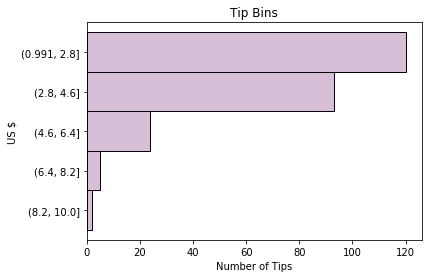

In [83]:
# I can plot my Series returned from `.value_counts()`

pd.cut(tip, 5).value_counts().plot.barh(color='thistle', width=1, ec='black')

plt.title('Tip Bins')
plt.xlabel('Number of Tips')
plt.ylabel('US $')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

##### Specify Bin Edges and Labels

The `.cut()` has parameters that make it versatile; I can define my own bins and labels.

In [84]:
# Define bin edges.
bin_edges = [0, 2, 4, 6, 8, 10.01]

# Create a list of bin labels; you should have one less than bin edges.
bin_labels = ['$0-1.99', '$2.00-3.99', '$4.00-5.99', '$6.00-7.99', '$8.00-10.00']

# Use the .cut() function to create 5 bins as defined and labeled and create Series of value_counts sorted by index value.
pd.cut(tip, bins=bin_edges, labels=bin_labels).value_counts().sort_index()

$0-1.99         78
$2.00-3.99     125
$4.00-5.99      34
$6.00-7.99       5
$8.00-10.00      2
Name: tip, dtype: int64

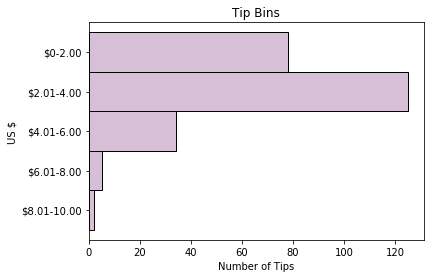

In [85]:
# Define bin edges
bin_edges = [0, 2, 4, 6, 8, 10.01]

# Create a list of bin labels
bin_labels = ['$0-2.00', '$2.01-4.00', '$4.01-6.00', '$6.01-8.00', '$8.01-10.00']

# Use the .cut() function to create my 5 equal-sized bins and create a horizontal bar plot to visualize value_counts().
pd.cut(tip, bins=bin_edges, labels=bin_labels).value_counts().sort_index().plot.barh(color='thistle', width=1, ec='black')

# Axes labels and plot title
plt.title('Tip Bins')
plt.xlabel('Number of Tips')
plt.ylabel('US $')

# Reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

# Clean up plot display
plt.show()